In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
cols = [
    "Start_Time",
    "Weather_Condition",
    "Visibility(mi)",
    "Severity",
    "State"
]

df = pd.read_csv(
    "data/US_Accidents.csv",
    usecols=cols,
    nrows=80000
)

df.head()


,Severity,Start_Time,State,Visibility(mi),Weather_Condition
0,3,2016-02-08 05:46:00,OH,10.0,Light Rain
1,2,2016-02-08 06:07:59,OH,10.0,Light Rain
2,2,2016-02-08 06:49:27,OH,10.0,Overcast
3,3,2016-02-08 07:23:34,OH,9.0,Mostly Cloudy
4,2,2016-02-08 07:39:07,OH,6.0,Mostly Cloudy


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           80000 non-null  int64  
 1   Start_Time         80000 non-null  object 
 2   State              80000 non-null  object 
 3   Visibility(mi)     78514 non-null  float64
 4   Weather_Condition  78755 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ MB


In [4]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"] = df["Start_Time"].dt.hour

df[["Start_Time", "Hour"]].head()


,Start_Time,Hour
0,2016-02-08 05:46:00,5
1,2016-02-08 06:07:59,6
2,2016-02-08 06:49:27,6
3,2016-02-08 07:23:34,7
4,2016-02-08 07:39:07,7


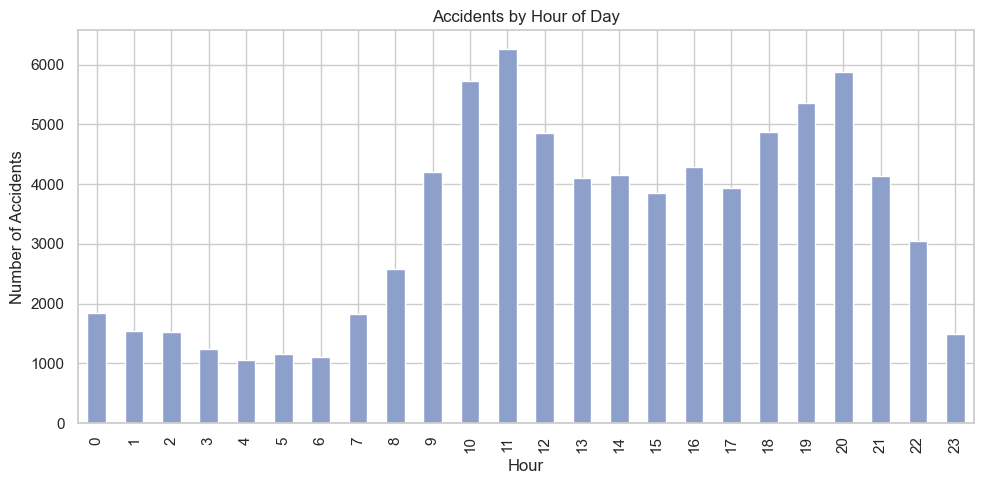

In [5]:
plt.figure(figsize=(10,5))

df["Hour"].value_counts().sort_index().plot(
    kind="bar",
    color="#8DA0CB"
)

plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.savefig("visualization/accidents_by_hour.png", dpi=300)
plt.show()


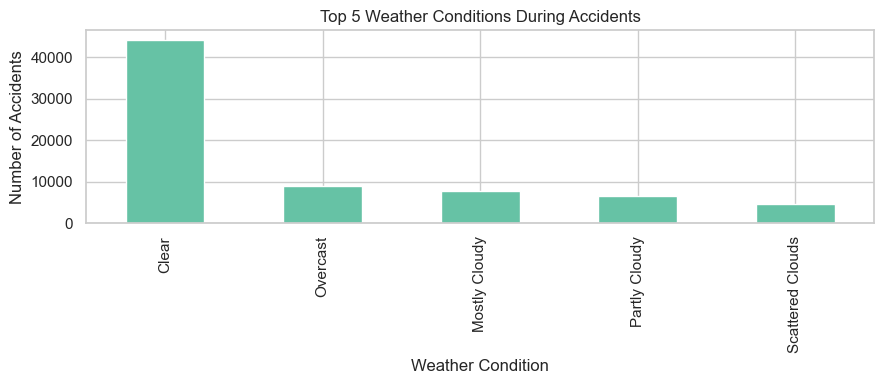

In [6]:
top_weather = df["Weather_Condition"].value_counts().head(5)

plt.figure(figsize=(9,4))

top_weather.plot(
    kind="bar",
    color="#66C2A5"
)

plt.title("Top 5 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.savefig("visualization/top_weather_conditions.png", dpi=300)
plt.show()


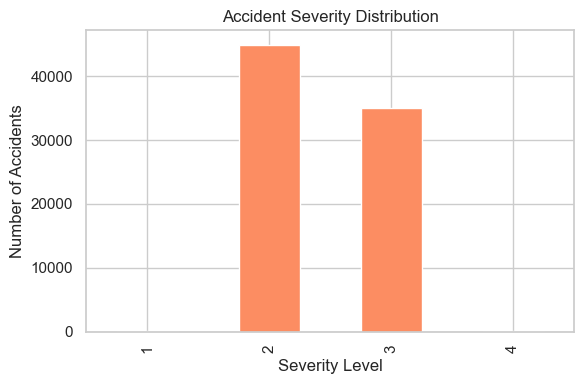

In [7]:
plt.figure(figsize=(6,4))

df["Severity"].value_counts().sort_index().plot(
    kind="bar",
    color="#FC8D62"
)

plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.savefig("visualization/severity_distribution.png", dpi=300)
plt.show()


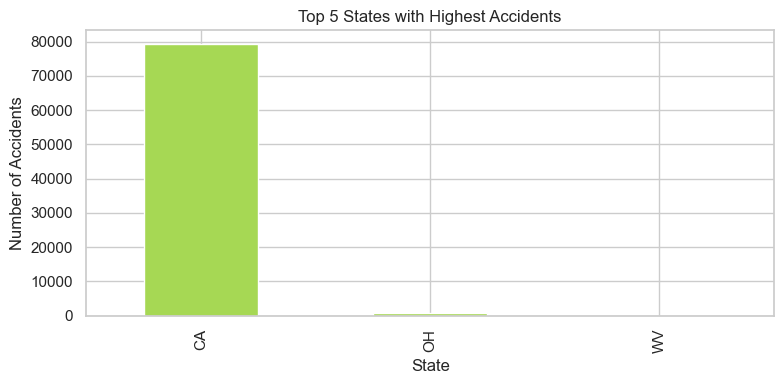

In [8]:
top_states = df["State"].value_counts().head(5)

plt.figure(figsize=(8,4))

top_states.plot(
    kind="bar",
    color="#A6D854"
)

plt.title("Top 5 States with Highest Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.savefig("visualization/top_states_accidents.png", dpi=300)
plt.show()
